In [580]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

#### date	Date	: The date of food waste measurement.
#### meals_served	: String (Numbers)	Number of meals served (stored as a string with extra spaces/symbols in some cases).
#### kitchen_staff	: String (Numbers)	Number of kitchen staff working (some values have formatting issues).
#### temperature_C	: Float	Temperature in Celsius (contains extreme values like -10°C and 60°C).
#### humidity_percent	: Float	Humidity percentage in the cafeteria.
#### day_of_week	: Integer	Numeric representation of the day (0=Monday, 6=Sunday).
#### special_event	: Boolean	Whether a special event was held (1=Yes, 0=No).
#### past_waste_kg	: Float	The amount of food waste generated in the previous cycle.
#### staff_experience	: Categorical (String)	Staff experience level (inconsistent casing: "Beginner", "intermediate", "EXPERT").
#### waste_category	: Categorical (String)	Type of food waste (e.g., "MeAt", "MEAT", "dairy", "grains").
#### food_waste_kg	: Float (Target)	The total food waste generated (kg) – Only in train.csv.

In [ ]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")


# DATA PREPROCESSING

## EDA

In [ ]:
df_train

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg
0,0,2022-12-19,196,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy,28.946465
1,1,2023-11-21,244,15,10.317872,64.430475,1,0,42.311779,NaN,MeAt,51.549053
2,4,2022-02-01,148,16,27.714300,69.046113,1,0,41.184305,Beginner,MeAt,53.008323
3,5,2023-03-19,157,19,19.173902,46.292823,6,0,41.543492,Beginner,MeAt,48.621527
4,6,2022-07-18,297,10,26.375233,79.741064,0,0,26.525097,Intermediate,MEAT,44.156984
...,...,...,...,...,...,...,...,...,...,...,...,...
906,1044,2022-03-29,395,18,17.354199,45.138435,1,0,40.550668,Intermediate,GRAINS,50.369152
907,1045,2022-11-27,483,11,24.912137,59.485091,6,0,36.470276,intermediate,dairy,43.070121
908,1046,2023-04-12,243,11,28.870945,70.508404,2,0,19.767203,Intermediate,MeAt,29.632560
909,1048,2022-02-14,406,10,19.061638,55.286642,0,0,28.560361,EXPERT,MEAT,44.615759


In [ ]:
df_test

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category
0,0,2022-12-19,196,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy
1,1,2023-11-21,244,15,10.317872,64.430475,1,0,42.311779,NaN,MeAt
2,4,2022-02-01,148,16,27.714300,69.046113,1,0,41.184305,Beginner,MeAt
3,5,2023-03-19,157,19,19.173902,46.292823,6,0,41.543492,Beginner,MeAt
4,6,2022-07-18,297,10,26.375233,79.741064,0,0,26.525097,Intermediate,MEAT
...,...,...,...,...,...,...,...,...,...,...,...
906,1044,2022-03-29,395,18,17.354199,45.138435,1,0,40.550668,Intermediate,GRAINS
907,1045,2022-11-27,483,11,24.912137,59.485091,6,0,36.470276,intermediate,dairy
908,1046,2023-04-12,243,11,28.870945,70.508404,2,0,19.767203,Intermediate,MeAt
909,1048,2022-02-14,406,10,19.061638,55.286642,0,0,28.560361,EXPERT,MEAT


In [ ]:
df_train.head()

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg
0,0,2022-12-19,196,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy,28.946465
1,1,2023-11-21,244,15,10.317872,64.430475,1,0,42.311779,NaN,MeAt,51.549053
2,4,2022-02-01,148,16,27.714300,69.046113,1,0,41.184305,Beginner,MeAt,53.008323
3,5,2023-03-19,157,19,19.173902,46.292823,6,0,41.543492,Beginner,MeAt,48.621527
4,6,2022-07-18,297,10,26.375233,79.741064,0,0,26.525097,Intermediate,MEAT,44.156984


In [ ]:
df_train.tail()

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg
906,1044,2022-03-29,395,18,17.354199,45.138435,1,0,40.550668,Intermediate,GRAINS,50.369152
907,1045,2022-11-27,483,11,24.912137,59.485091,6,0,36.470276,intermediate,dairy,43.070121
908,1046,2023-04-12,243,11,28.870945,70.508404,2,0,19.767203,Intermediate,MeAt,29.632560
909,1048,2022-02-14,406,10,19.061638,55.286642,0,0,28.560361,EXPERT,MEAT,44.615759
910,1049,2024-05-10,350,6,23.708015,51.351286,4,0,46.786860,intermediate,Vegetables,57.066481


In [ ]:
df_train.sample(5)

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg
31,34,2022-04-12,114,8,24.756598,38.251426,1,0,25.343897,NaN,MeAt,23.016292
461,537,2022-01-12,187,13,18.160839,30.229028,2,0,42.337529,EXPERT,MEAT,48.106298
385,451,2024-01-08,302,12,25.374456,32.724197,0,0,14.317569,intermediate,MeAt,31.785807
693,807,2024-09-15,102,8,16.358050,32.100475,6,0,37.365549,NaN,MEAT,27.938959
882,1019,2022-09-01,302,18,25.138454,65.759331,3,1,12.473368,NaN,MEAT,49.759978


In [ ]:
df_train.describe()

,ID,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,food_waste_kg
count,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000
mean,528.327113,375.405049,11.900110,22.189280,60.761313,3.014270,0.085620,27.015691,44.842691
std,305.072794,502.812717,4.285153,8.922389,17.330821,2.009542,0.279956,12.774223,27.934366
min,0.000000,100.000000,5.000000,-10.372207,30.121111,0.000000,0.000000,5.008394,10.819048
25%,266.000000,211.000000,8.000000,15.684585,46.017835,1.000000,0.000000,16.091383,32.887912
50%,531.000000,306.000000,12.000000,22.115040,61.633960,3.000000,0.000000,26.854109,41.146930
75%,795.500000,407.000000,15.000000,28.804294,75.787910,5.000000,0.000000,38.149878,50.046681
max,1049.000000,4730.000000,19.000000,60.000000,89.982828,6.000000,1.000000,49.803703,274.328783


In [ ]:
df_train.describe(include="object")


,date,staff_experience,waste_category
count,911,747,911
unique,867,4,5
top,2022-01-28,Beginner,MEAT
freq,2,191,210


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                911 non-null    int64  
 1   date              911 non-null    object 
 2   meals_served      911 non-null    int64  
 3   kitchen_staff     911 non-null    int64  
 4   temperature_C     911 non-null    float64
 5   humidity_percent  911 non-null    float64
 6   day_of_week       911 non-null    int64  
 7   special_event     911 non-null    int64  
 8   past_waste_kg     911 non-null    float64
 9   staff_experience  747 non-null    object 
 10  waste_category    911 non-null    object 
 11  food_waste_kg     911 non-null    float64
dtypes: float64(4), int64(5), object(3)
memory usage: 85.5+ KB


In [ ]:
df_train.isnull().sum()

ID                    0
date                  0
meals_served          0
kitchen_staff         0
temperature_C         0
humidity_percent      0
day_of_week           0
special_event         0
past_waste_kg         0
staff_experience    164
waste_category        0
food_waste_kg         0
dtype: int64

In [ ]:
df_test.isnull().sum()

ID                    0
date                  0
meals_served          0
kitchen_staff         0
temperature_C         0
humidity_percent      0
day_of_week           0
special_event         0
past_waste_kg         0
staff_experience    164
waste_category        0
dtype: int64

In [ ]:
# "staff_experience" has null values
df_train.duplicated().sum()

np.int64(0)

In [ ]:
df_test.duplicated().sum()

np.int64(0)

In [594]:
# importing my Data cleaning Package for Outliers Handling anda EDA
from Data_Cleaning import DataCleaningClass

## DATA CLEANING

### Drop not importing features

In [ ]:
# Just ID ,date ,meals_served and kitchen_staff Column will be dropped out
df_train.drop(columns=["ID","date"],inplace=True)

In [ ]:
num_cols = df_train.select_dtypes("number")
num_colsTEST = df_test.select_dtypes("number")

In [ ]:
df_train

,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg
0,196,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy,28.946465
1,244,15,10.317872,64.430475,1,0,42.311779,NaN,MeAt,51.549053
2,148,16,27.714300,69.046113,1,0,41.184305,Beginner,MeAt,53.008323
3,157,19,19.173902,46.292823,6,0,41.543492,Beginner,MeAt,48.621527
4,297,10,26.375233,79.741064,0,0,26.525097,Intermediate,MEAT,44.156984
...,...,...,...,...,...,...,...,...,...,...
906,395,18,17.354199,45.138435,1,0,40.550668,Intermediate,GRAINS,50.369152
907,483,11,24.912137,59.485091,6,0,36.470276,intermediate,dairy,43.070121
908,243,11,28.870945,70.508404,2,0,19.767203,Intermediate,MeAt,29.632560
909,406,10,19.061638,55.286642,0,0,28.560361,EXPERT,MEAT,44.615759


In [ ]:
df_test

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category
0,0,2022-12-19,196,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy
1,1,2023-11-21,244,15,10.317872,64.430475,1,0,42.311779,NaN,MeAt
2,4,2022-02-01,148,16,27.714300,69.046113,1,0,41.184305,Beginner,MeAt
3,5,2023-03-19,157,19,19.173902,46.292823,6,0,41.543492,Beginner,MeAt
4,6,2022-07-18,297,10,26.375233,79.741064,0,0,26.525097,Intermediate,MEAT
...,...,...,...,...,...,...,...,...,...,...,...
906,1044,2022-03-29,395,18,17.354199,45.138435,1,0,40.550668,Intermediate,GRAINS
907,1045,2022-11-27,483,11,24.912137,59.485091,6,0,36.470276,intermediate,dairy
908,1046,2023-04-12,243,11,28.870945,70.508404,2,0,19.767203,Intermediate,MeAt
909,1048,2022-02-14,406,10,19.061638,55.286642,0,0,28.560361,EXPERT,MEAT


In [599]:
num_cols

,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,food_waste_kg
0,196,13,27.887273,45.362854,0,0,7.740587,28.946465
1,244,15,10.317872,64.430475,1,0,42.311779,51.549053
2,148,16,27.714300,69.046113,1,0,41.184305,53.008323
3,157,19,19.173902,46.292823,6,0,41.543492,48.621527
4,297,10,26.375233,79.741064,0,0,26.525097,44.156984
...,...,...,...,...,...,...,...,...
906,395,18,17.354199,45.138435,1,0,40.550668,50.369152
907,483,11,24.912137,59.485091,6,0,36.470276,43.070121
908,243,11,28.870945,70.508404,2,0,19.767203,29.632560
909,406,10,19.061638,55.286642,0,0,28.560361,44.615759


### Check For Outliers

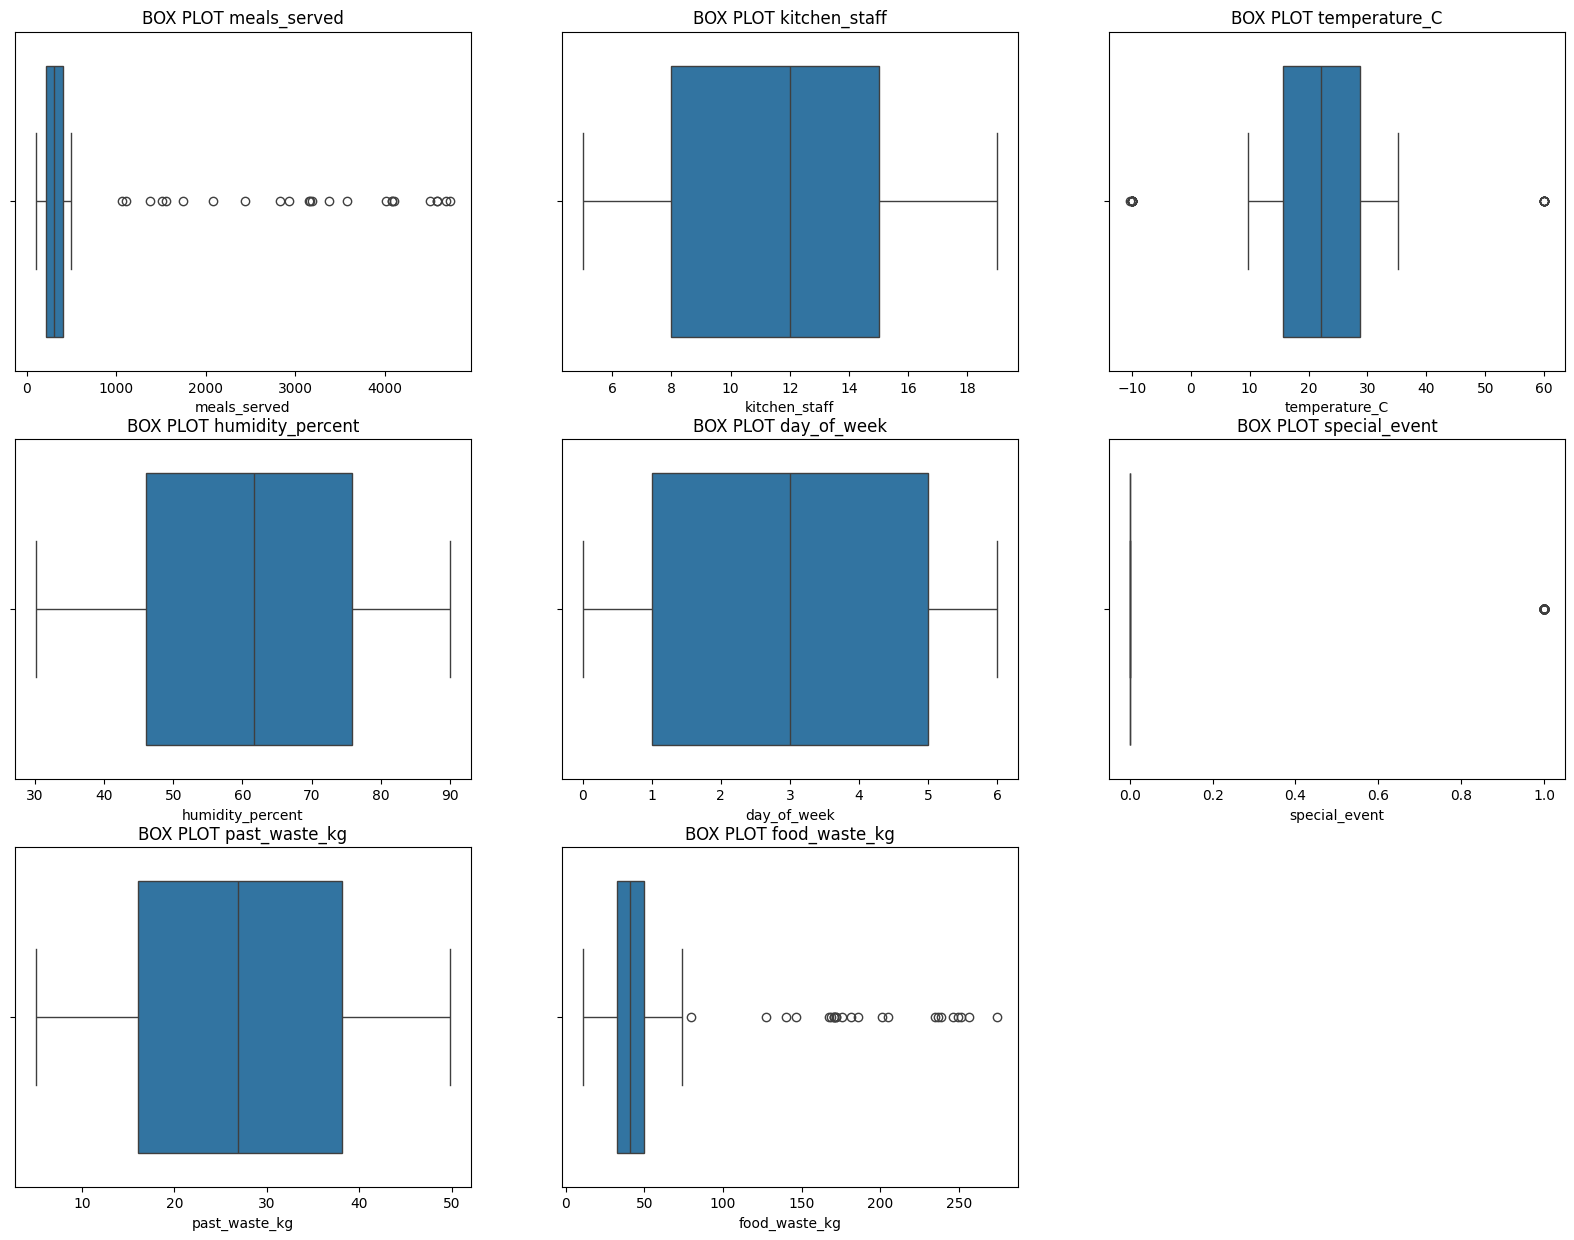

In [ ]:
date_cleaning = DataCleaningClass()

date_cleaning.CheckOutliers(df_train,num_cols)

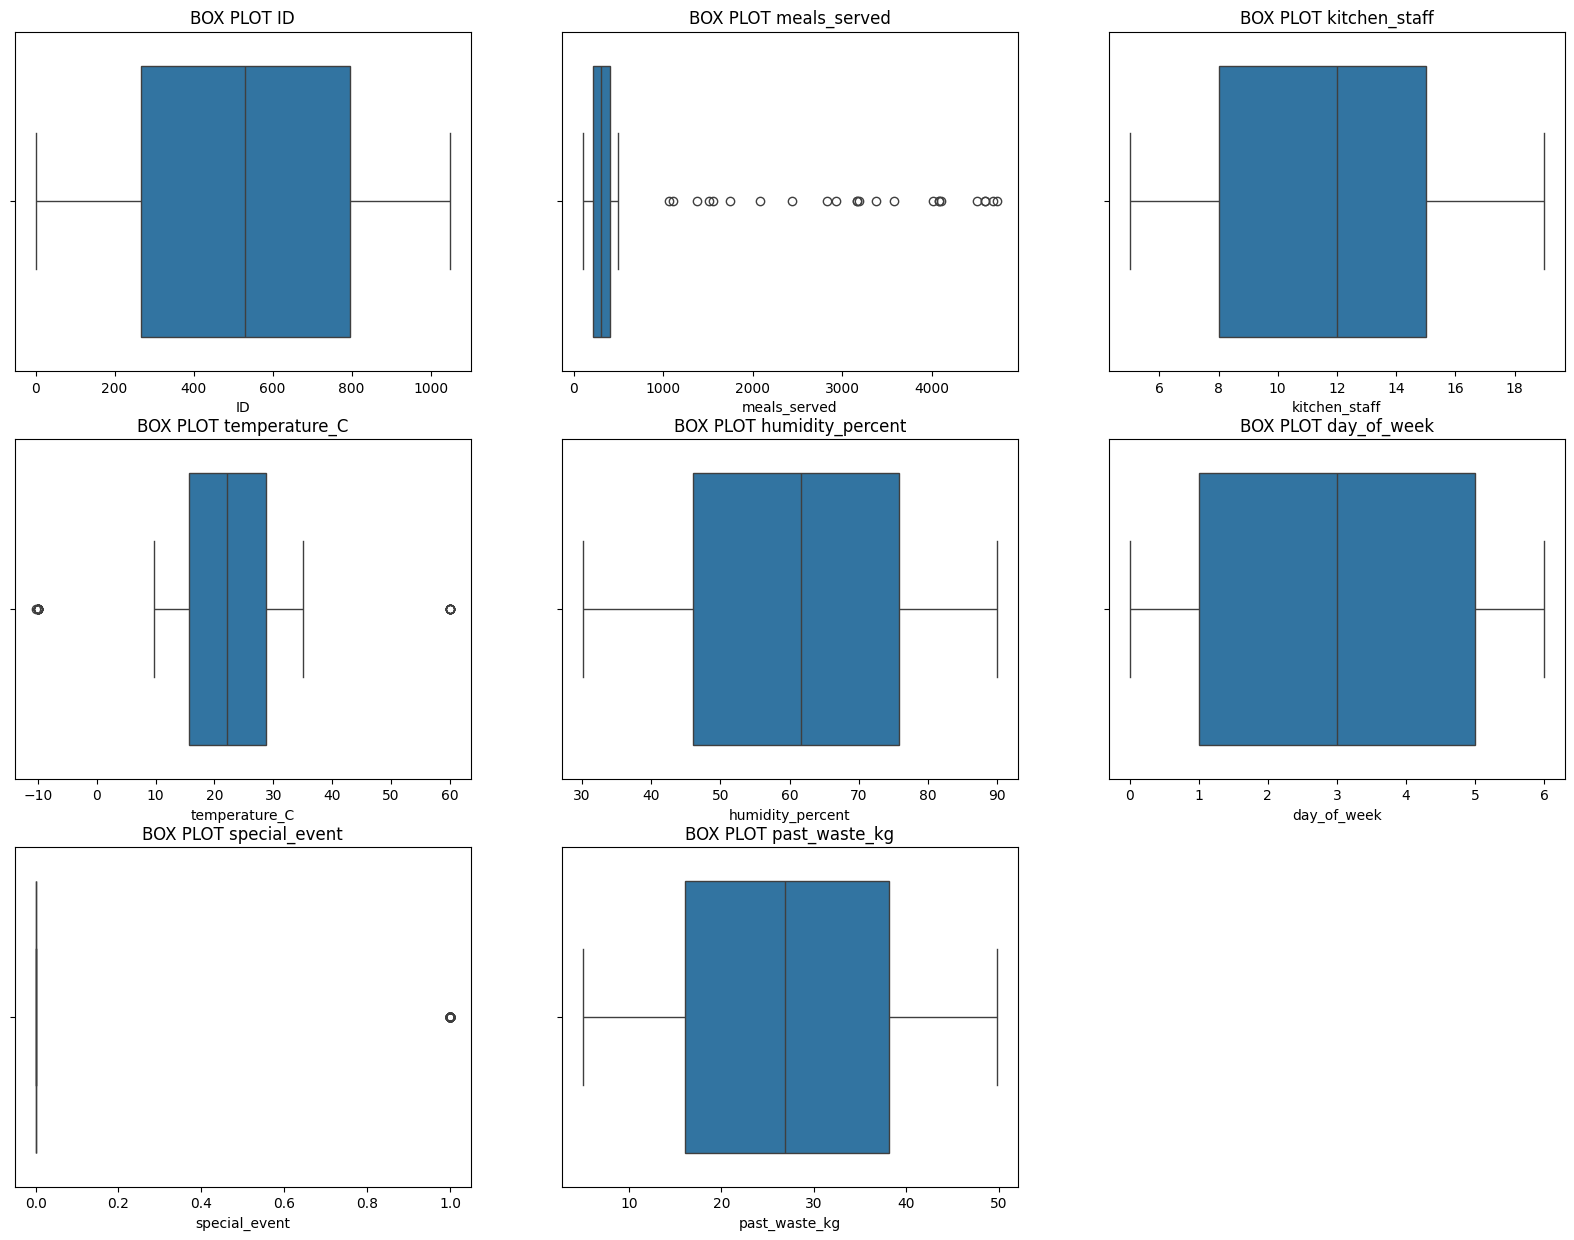

In [ ]:
date_cleaning = DataCleaningClass()

date_cleaning.CheckOutliers(df_test,num_colsTEST)

In [ ]:
df_train = date_cleaning.RemoveOutliers(df_train,num_cols.columns.drop("special_event"))
# i did not remove Outliers from this feature "special_event" cause it's important, because special event is special and not ordinary.

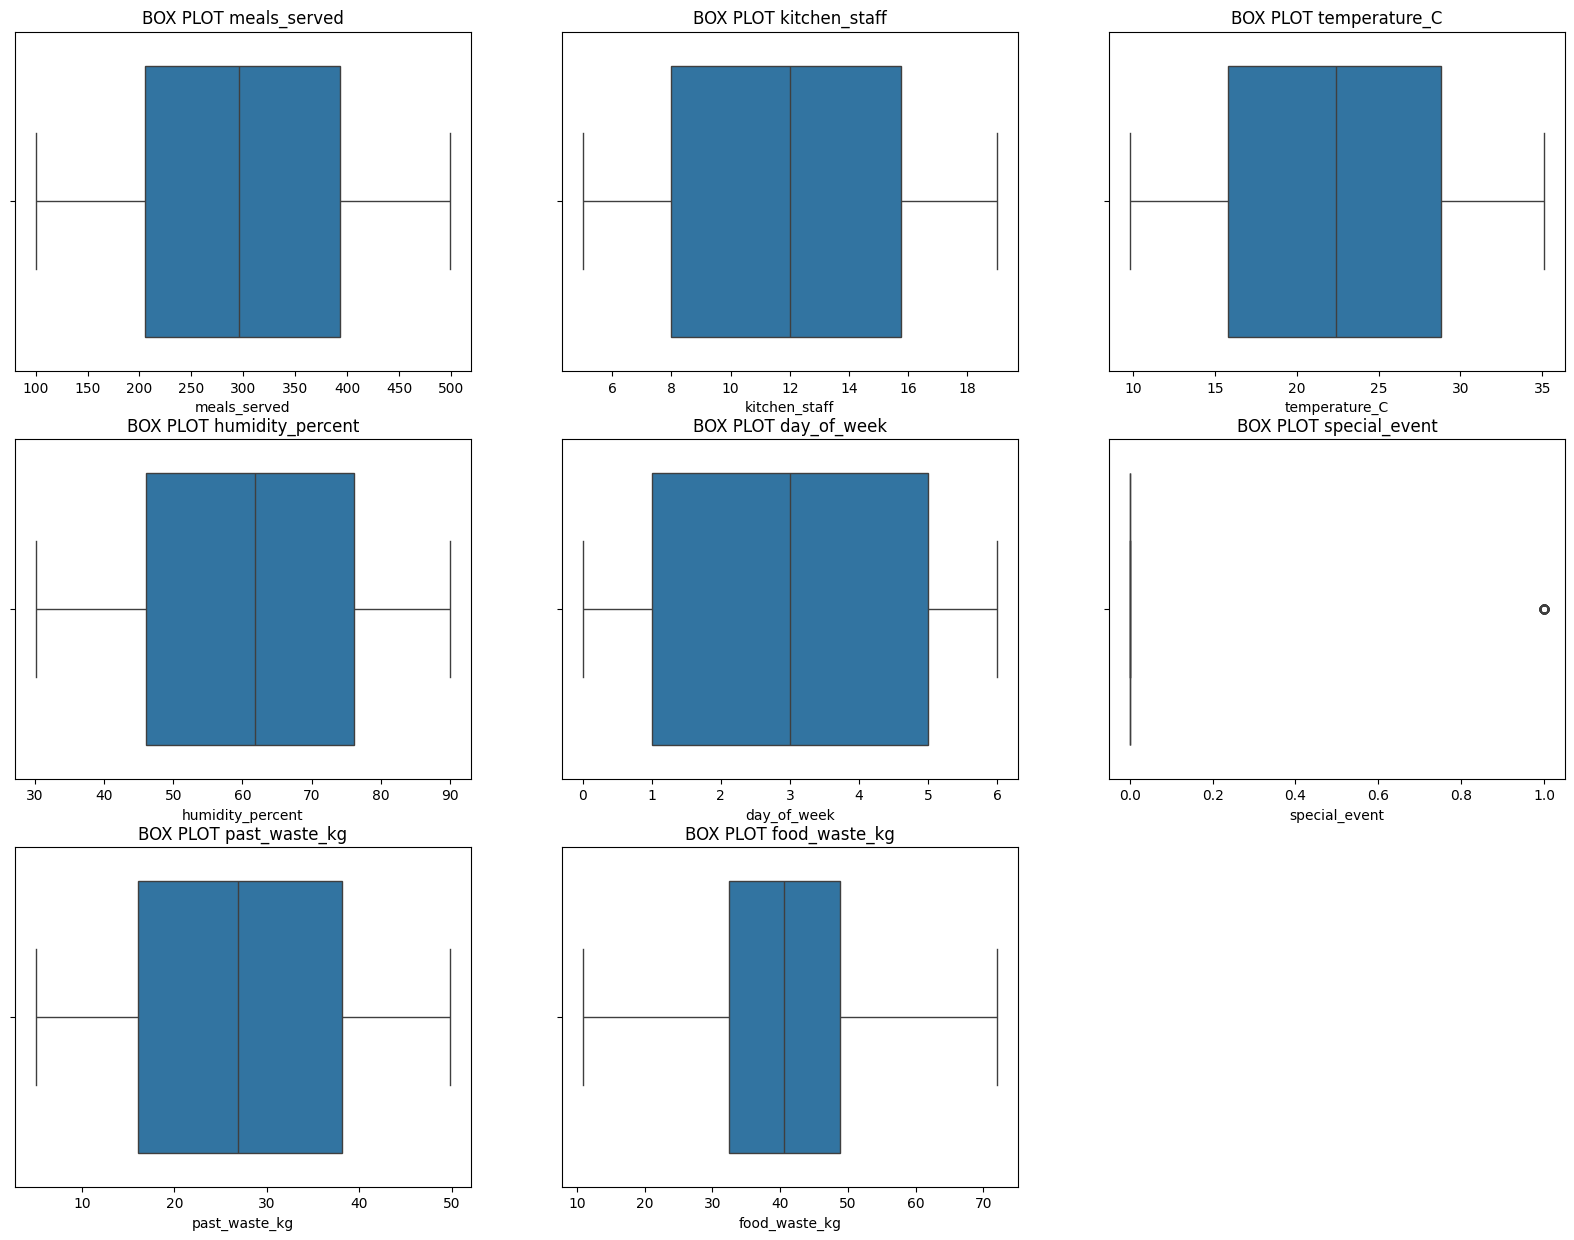

In [ ]:
date_cleaning.CheckOutliers(df_train,num_cols)

In [ ]:
df_test = date_cleaning.RemoveOutliers(df_test,num_colsTEST.columns.drop("special_event"))

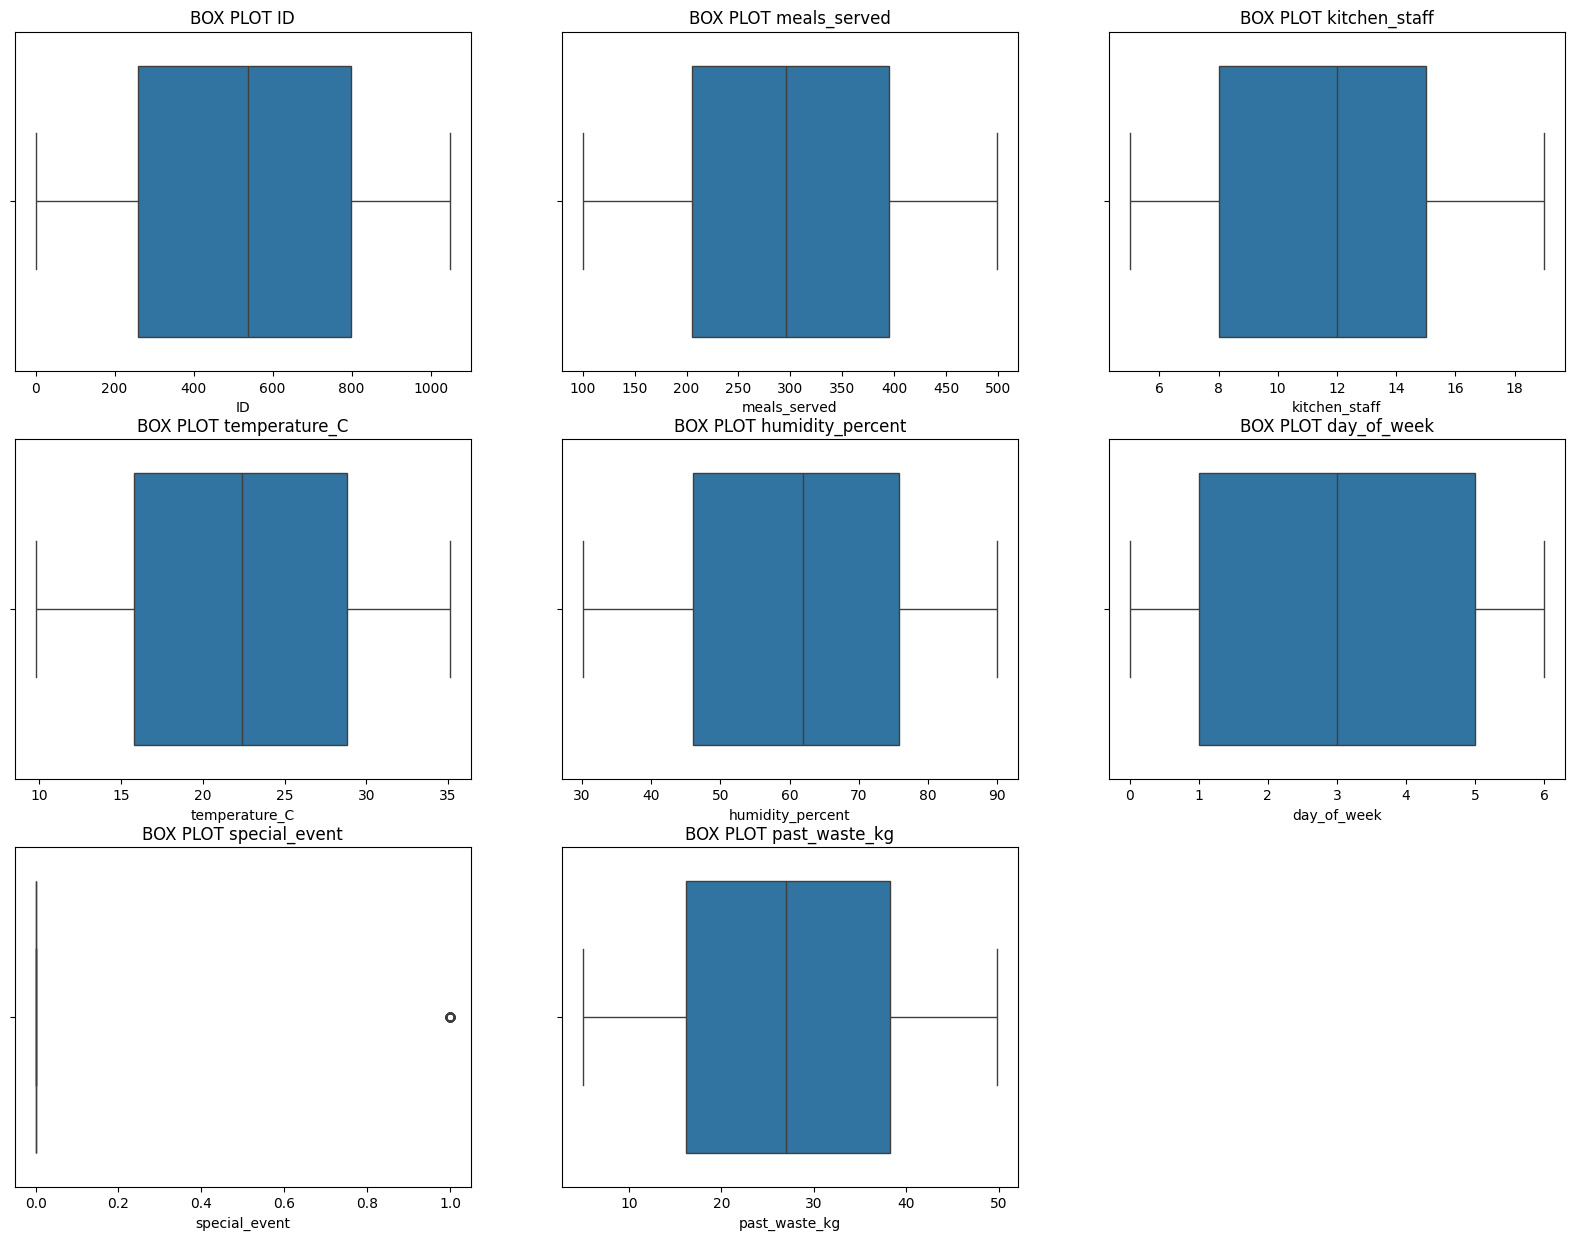

In [ ]:
date_cleaning.CheckOutliers(df_test,num_colsTEST)

### Change Data Type

In [ ]:
cat_cols = df_train.select_dtypes("object")
df_train[cat_cols.columns] = cat_cols.astype("category")

In [ ]:
cat_cols = df_test.select_dtypes("object")
df_test[cat_cols.columns] = cat_cols.astype("category")

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 865 entries, 0 to 910
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   ID                865 non-null    int64   
 1   date              865 non-null    category
 2   meals_served      865 non-null    int64   
 3   kitchen_staff     865 non-null    int64   
 4   temperature_C     865 non-null    float64 
 5   humidity_percent  865 non-null    float64 
 6   day_of_week       865 non-null    int64   
 7   special_event     865 non-null    int64   
 8   past_waste_kg     865 non-null    float64 
 9   staff_experience  703 non-null    category
 10  waste_category    865 non-null    category
dtypes: category(3), float64(3), int64(5)
memory usage: 103.3 KB


### Fill null values

In [ ]:
se_mode = df_train["staff_experience"].mode().iloc[0]
df_train["staff_experience"].fillna(se_mode, inplace=True)

C:\Users\tvs21\AppData\Local\Temp\ipykernel_27092\1730846418.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dx["staff_experience"].fillna(se_mode, inplace=True)


In [ ]:
se_mode = df_test["staff_experience"].mode().iloc[0]
df_test["staff_experience"].fillna(se_mode, inplace=True)

C:\Users\tvs21\AppData\Local\Temp\ipykernel_27092\2529886796.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dy["staff_experience"].fillna(se_mode, inplace=True)


In [ ]:
df_train.isnull().sum()

meals_served        0
kitchen_staff       0
temperature_C       0
humidity_percent    0
day_of_week         0
special_event       0
past_waste_kg       0
staff_experience    0
waste_category      0
food_waste_kg       0
dtype: int64

In [ ]:
df_test.isnull().sum()

ID                  0
date                0
meals_served        0
kitchen_staff       0
temperature_C       0
humidity_percent    0
day_of_week         0
special_event       0
past_waste_kg       0
staff_experience    0
waste_category      0
dtype: int64

In [ ]:
df_train

,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg
0,196,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy,28.946465
1,244,15,10.317872,64.430475,1,0,42.311779,Intermediate,MeAt,51.549053
2,148,16,27.714300,69.046113,1,0,41.184305,Beginner,MeAt,53.008323
3,157,19,19.173902,46.292823,6,0,41.543492,Beginner,MeAt,48.621527
4,297,10,26.375233,79.741064,0,0,26.525097,Intermediate,MEAT,44.156984
...,...,...,...,...,...,...,...,...,...,...
906,395,18,17.354199,45.138435,1,0,40.550668,Intermediate,GRAINS,50.369152
907,483,11,24.912137,59.485091,6,0,36.470276,intermediate,dairy,43.070121
908,243,11,28.870945,70.508404,2,0,19.767203,Intermediate,MeAt,29.632560
909,406,10,19.061638,55.286642,0,0,28.560361,EXPERT,MEAT,44.615759


In [ ]:
df_test

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category
0,0,2022-12-19,196,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy
1,1,2023-11-21,244,15,10.317872,64.430475,1,0,42.311779,Intermediate,MeAt
2,4,2022-02-01,148,16,27.714300,69.046113,1,0,41.184305,Beginner,MeAt
3,5,2023-03-19,157,19,19.173902,46.292823,6,0,41.543492,Beginner,MeAt
4,6,2022-07-18,297,10,26.375233,79.741064,0,0,26.525097,Intermediate,MEAT
...,...,...,...,...,...,...,...,...,...,...,...
906,1044,2022-03-29,395,18,17.354199,45.138435,1,0,40.550668,Intermediate,GRAINS
907,1045,2022-11-27,483,11,24.912137,59.485091,6,0,36.470276,intermediate,dairy
908,1046,2023-04-12,243,11,28.870945,70.508404,2,0,19.767203,Intermediate,MeAt
909,1048,2022-02-14,406,10,19.061638,55.286642,0,0,28.560361,EXPERT,MEAT


# SPLITTING

In [615]:
from sklearn.model_selection import train_test_split

In [ ]:
x = df_train.drop(columns="food_waste_kg")
y = df_train["food_waste_kg"]
spliter = train_test_split
x_train,x_test,y_train,y_test = spliter(x,y,test_size=0.2,random_state=42)

In [617]:
x_train

,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category
200,439,18,14.354833,54.254384,5,0,13.859954,Intermediate,GRAINS
161,479,6,24.523301,42.039061,4,0,12.407923,Intermediate,dairy
337,346,17,22.528825,85.848438,1,1,23.100068,intermediate,MEAT
105,352,12,33.677972,78.443762,5,0,10.380290,Intermediate,GRAINS
390,225,17,21.219439,32.686707,1,0,19.867616,Beginner,MeAt
...,...,...,...,...,...,...,...,...,...
74,385,14,20.449748,57.006992,2,0,10.584832,intermediate,MEAT
110,269,16,23.561966,45.401654,4,0,6.084959,Beginner,GRAINS
282,314,18,14.828322,36.380624,0,0,11.210697,Beginner,MEAT
467,212,6,18.075280,65.688193,6,0,7.874590,Beginner,MEAT


In [618]:
y_train

200    31.350511
161    38.444548
337    56.657850
105    42.437798
390    31.778867
         ...    
74     28.111738
110    22.433787
282    29.955870
467    23.810969
106    37.967789
Name: food_waste_kg, Length: 689, dtype: float64

# Normalization 

In [619]:
from sklearn.preprocessing import MinMaxScaler

In [620]:
scaler = MinMaxScaler()
num_cols = x_train.select_dtypes(include=['number']).columns
x_train[num_cols] = scaler.fit_transform(x_train[num_cols])
x_test[num_cols] = scaler.transform(x_test[num_cols])

In [621]:
x_train

,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category
200,0.849624,0.928571,0.180451,0.403150,0.833333,0.0,0.197600,Intermediate,GRAINS
161,0.949875,0.071429,0.581838,0.199091,0.666667,0.0,0.165185,Intermediate,dairy
337,0.616541,0.857143,0.503108,0.930934,0.166667,1.0,0.403874,intermediate,MEAT
105,0.631579,0.500000,0.943206,0.807238,0.833333,0.0,0.119921,Intermediate,GRAINS
390,0.313283,0.857143,0.451422,0.042859,0.166667,0.0,0.331714,Beginner,MeAt
...,...,...,...,...,...,...,...,...,...
74,0.714286,0.642857,0.421040,0.449133,0.333333,0.0,0.124487,intermediate,MEAT
110,0.423559,0.785714,0.543890,0.255264,0.666667,0.0,0.024033,Beginner,GRAINS
282,0.536341,0.928571,0.199142,0.104566,0.000000,0.0,0.138459,Beginner,MEAT
467,0.280702,0.071429,0.327311,0.594154,1.000000,0.0,0.063984,Beginner,MEAT


In [622]:
x_train

,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category
200,0.849624,0.928571,0.180451,0.403150,0.833333,0.0,0.197600,Intermediate,GRAINS
161,0.949875,0.071429,0.581838,0.199091,0.666667,0.0,0.165185,Intermediate,dairy
337,0.616541,0.857143,0.503108,0.930934,0.166667,1.0,0.403874,intermediate,MEAT
105,0.631579,0.500000,0.943206,0.807238,0.833333,0.0,0.119921,Intermediate,GRAINS
390,0.313283,0.857143,0.451422,0.042859,0.166667,0.0,0.331714,Beginner,MeAt
...,...,...,...,...,...,...,...,...,...
74,0.714286,0.642857,0.421040,0.449133,0.333333,0.0,0.124487,intermediate,MEAT
110,0.423559,0.785714,0.543890,0.255264,0.666667,0.0,0.024033,Beginner,GRAINS
282,0.536341,0.928571,0.199142,0.104566,0.000000,0.0,0.138459,Beginner,MEAT
467,0.280702,0.071429,0.327311,0.594154,1.000000,0.0,0.063984,Beginner,MEAT


In [623]:
x_test

,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category
758,0.370927,0.285714,0.657458,0.351394,0.500000,0.0,0.361853,intermediate,MEAT
644,0.764411,0.428571,0.475219,0.842153,1.000000,0.0,0.040286,intermediate,MeAt
124,0.122807,0.142857,0.960378,0.282461,0.166667,0.0,0.897531,Beginner,Vegetables
217,0.250627,0.642857,0.276130,0.582591,0.000000,0.0,0.025499,EXPERT,MEAT
403,0.779449,0.857143,0.799372,0.096439,0.000000,0.0,0.062605,EXPERT,GRAINS
...,...,...,...,...,...,...,...,...,...
246,0.699248,0.142857,0.607865,0.062813,0.166667,1.0,0.166624,Intermediate,GRAINS
352,0.591479,1.000000,0.191569,0.737246,0.666667,0.0,0.347017,EXPERT,GRAINS
224,0.230576,0.000000,0.183110,0.203432,0.833333,0.0,0.235384,EXPERT,MeAt
843,0.385965,0.000000,0.557862,0.240768,0.000000,0.0,0.209164,Intermediate,dairy


# ENCODING

In [624]:
from sklearn.preprocessing import OneHotEncoder

In [625]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 689 entries, 200 to 106
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   meals_served      689 non-null    float64 
 1   kitchen_staff     689 non-null    float64 
 2   temperature_C     689 non-null    float64 
 3   humidity_percent  689 non-null    float64 
 4   day_of_week       689 non-null    float64 
 5   special_event     689 non-null    float64 
 6   past_waste_kg     689 non-null    float64 
 7   staff_experience  689 non-null    category
 8   waste_category    689 non-null    category
dtypes: category(2), float64(7)
memory usage: 44.8 KB


In [626]:
cat_cols = x_train.select_dtypes('category').columns
cat_cols

Index(['staff_experience', 'waste_category'], dtype='object')

In [627]:
cat_cols = x_train.select_dtypes('category').columns

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')


train_encoded = encoder.fit_transform(x_train[cat_cols])
test_encoded = encoder.transform(x_test[cat_cols])

# Convert to DataFrames
train_encoded_df = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out(cat_cols), index=x_train.index)
test_encoded_df = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out(cat_cols), index=x_test.index)

x_train = x_train.drop(columns=cat_cols).join(train_encoded_df)
x_test = x_test.drop(columns=cat_cols).join(test_encoded_df)

In [628]:
x_train

,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience_Beginner,staff_experience_EXPERT,staff_experience_Intermediate,staff_experience_intermediate,waste_category_GRAINS,waste_category_MEAT,waste_category_MeAt,waste_category_Vegetables,waste_category_dairy
200,0.849624,0.928571,0.180451,0.403150,0.833333,0.0,0.197600,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
161,0.949875,0.071429,0.581838,0.199091,0.666667,0.0,0.165185,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
337,0.616541,0.857143,0.503108,0.930934,0.166667,1.0,0.403874,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
105,0.631579,0.500000,0.943206,0.807238,0.833333,0.0,0.119921,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
390,0.313283,0.857143,0.451422,0.042859,0.166667,0.0,0.331714,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,0.714286,0.642857,0.421040,0.449133,0.333333,0.0,0.124487,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
110,0.423559,0.785714,0.543890,0.255264,0.666667,0.0,0.024033,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
282,0.536341,0.928571,0.199142,0.104566,0.000000,0.0,0.138459,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
467,0.280702,0.071429,0.327311,0.594154,1.000000,0.0,0.063984,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [629]:
x_test

,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience_Beginner,staff_experience_EXPERT,staff_experience_Intermediate,staff_experience_intermediate,waste_category_GRAINS,waste_category_MEAT,waste_category_MeAt,waste_category_Vegetables,waste_category_dairy
758,0.370927,0.285714,0.657458,0.351394,0.500000,0.0,0.361853,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
644,0.764411,0.428571,0.475219,0.842153,1.000000,0.0,0.040286,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
124,0.122807,0.142857,0.960378,0.282461,0.166667,0.0,0.897531,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
217,0.250627,0.642857,0.276130,0.582591,0.000000,0.0,0.025499,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
403,0.779449,0.857143,0.799372,0.096439,0.000000,0.0,0.062605,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,0.699248,0.142857,0.607865,0.062813,0.166667,1.0,0.166624,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
352,0.591479,1.000000,0.191569,0.737246,0.666667,0.0,0.347017,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
224,0.230576,0.000000,0.183110,0.203432,0.833333,0.0,0.235384,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
843,0.385965,0.000000,0.557862,0.240768,0.000000,0.0,0.209164,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [630]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder


In [631]:

pipeline = Pipeline([
    ('model', LinearRegression())

])

In [632]:
y_train

200    31.350511
161    38.444548
337    56.657850
105    42.437798
390    31.778867
         ...    
74     28.111738
110    22.433787
282    29.955870
467    23.810969
106    37.967789
Name: food_waste_kg, Length: 689, dtype: float64

In [633]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('model', LinearRegression())])

# EVALUATION

In [634]:
from sklearn.metrics import mean_absolute_error, r2_score

In [635]:
y_predict = pipeline.predict(x_train)

mae = mean_absolute_error(y_train, y_predict)
r2 = r2_score(y_train, y_predict)

print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")

MAE: 3.96
R²: 0.82


# TEST SUBMISSION PREPARING

In [ ]:
df_test

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category
0,0,2022-12-19,196,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy
1,1,2023-11-21,244,15,10.317872,64.430475,1,0,42.311779,Intermediate,MeAt
2,4,2022-02-01,148,16,27.714300,69.046113,1,0,41.184305,Beginner,MeAt
3,5,2023-03-19,157,19,19.173902,46.292823,6,0,41.543492,Beginner,MeAt
4,6,2022-07-18,297,10,26.375233,79.741064,0,0,26.525097,Intermediate,MEAT
...,...,...,...,...,...,...,...,...,...,...,...
906,1044,2022-03-29,395,18,17.354199,45.138435,1,0,40.550668,Intermediate,GRAINS
907,1045,2022-11-27,483,11,24.912137,59.485091,6,0,36.470276,intermediate,dairy
908,1046,2023-04-12,243,11,28.870945,70.508404,2,0,19.767203,Intermediate,MeAt
909,1048,2022-02-14,406,10,19.061638,55.286642,0,0,28.560361,EXPERT,MEAT


In [ ]:
id = df_test['ID']
testFeatures = df_test.drop(columns=["ID", "date"])

In [638]:
num_cols_test_s = testFeatures.select_dtypes('number').columns
testFeatures[num_cols_test_s] = scaler.transform(testFeatures[num_cols_test_s])

In [639]:
testFeatures

,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category
0,0.240602,0.571429,0.714626,0.254616,0.000000,0.0,0.060993,intermediate,dairy
1,0.360902,0.714286,0.021098,0.573144,0.166667,0.0,0.832752,Intermediate,MeAt
2,0.120301,0.785714,0.707798,0.650249,0.166667,0.0,0.807583,Beginner,MeAt
3,0.142857,1.000000,0.370677,0.270151,1.000000,0.0,0.815601,Beginner,MeAt
4,0.493734,0.357143,0.654940,0.828910,0.000000,0.0,0.480334,Intermediate,MEAT
...,...,...,...,...,...,...,...,...,...
906,0.739348,0.928571,0.298847,0.250867,0.166667,0.0,0.793437,Intermediate,GRAINS
907,0.959900,0.428571,0.597186,0.490530,1.000000,0.0,0.702348,intermediate,dairy
908,0.358396,0.428571,0.753455,0.674676,0.333333,0.0,0.329472,Intermediate,MeAt
909,0.766917,0.357143,0.366246,0.420394,0.000000,0.0,0.525769,EXPERT,MEAT


In [640]:
num_cols_test_s = testFeatures.select_dtypes('number').columns
testFeatures[num_cols_test_s] = scaler.transform(testFeatures[num_cols_test_s])

In [641]:
test_encoded2 = encoder.transform(testFeatures[cat_cols])

# Convert to DataFrames
test_encoded_df2 = pd.DataFrame(test_encoded2, columns=encoder.get_feature_names_out(cat_cols), index=testFeatures.index)

testFeatures = testFeatures.drop(columns=cat_cols).join(test_encoded_df2)

In [642]:
testFeatures

,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience_Beginner,staff_experience_EXPERT,staff_experience_Intermediate,staff_experience_intermediate,waste_category_GRAINS,waste_category_MEAT,waste_category_MeAt,waste_category_Vegetables,waste_category_dairy
0,-0.250024,-0.316327,-0.357977,-0.498925,0.000000,0.0,-0.110445,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,-0.249722,-0.306122,-0.385353,-0.493604,0.027778,0.0,-0.093216,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.250325,-0.301020,-0.358247,-0.492316,0.027778,0.0,-0.093778,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.250269,-0.285714,-0.371554,-0.498665,0.166667,0.0,-0.093599,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.249389,-0.331633,-0.360333,-0.489331,0.000000,0.0,-0.101083,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,-0.248774,-0.290816,-0.374389,-0.498987,0.027778,0.0,-0.094094,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
907,-0.248221,-0.326531,-0.362613,-0.494984,0.166667,0.0,-0.096127,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
908,-0.249728,-0.326531,-0.356444,-0.491908,0.055556,0.0,-0.104451,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
909,-0.248704,-0.331633,-0.371729,-0.496155,0.000000,0.0,-0.100069,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [643]:
test_predict = pipeline.predict(testFeatures)

In [644]:
submission = pd.DataFrame({
    "ID": id,
    "food_waste_kg": test_predict
})

In [651]:
submission.to_csv("submission.csv", index=False)
print("Submission file DONE successfully!")
display(submission.head())

Submission file DONE successfully!


,ID,food_waste_kg
0,0,-1.135558
1,1,0.465089
2,4,2.011119
3,5,2.029165
4,6,1.015450


# DONE